## Map making in Python

Map making in Python involves utilizing various libraries and tools to create visually appealing and informative maps for geospatial analysis and visualization. One of the key libraries used for this purpose is GeoPandas, which extends the capabilities of Pandas to support geospatial data. GeoPandas allows users to easily read, manipulate, analyze, and visualize geospatial datasets, such as shapefiles and GeoJSON files. With GeoPandas, users can perform operations like overlaying multiple layers, creating choropleth maps, and adding custom markers to maps. By leveraging the power of Matplotlib, Folium, and other visualization libraries, Python users can create interactive and static maps that effectively communicate spatial patterns, trends, and insights. Whether for academic research, urban planning, environmental monitoring, or business intelligence, map making in Python with GeoPandas offers a versatile and efficient solution for geospatial data analysis and visualization needs.

In the lecture, we will cover
- the format for geospatial data
- reading and processing geospatial data
- creating choropleth maps
- cutomizing the color and legend
- adding multiple layers to the maps
- creating interactive maps

In [26]:
#pip install geopandas geodatasets folium mapclassify

### Geospatial data resource and format

A .shp file, short for Shapefile, is a commonly used file format in geospatial data analysis and mapping. It stores vector data, including points, lines, and polygons, along with associated attributes. Shapefiles are widely supported by GIS (Geographic Information Systems) software and libraries, making them a popular choice for storing and sharing geospatial datasets. They consist of multiple files, including a main .shp file containing the geometric data, a .shx file containing the shape index, and a .dbf file containing attribute data. 

#### Plotly

Plotly is a powerful library in Python for creating interactive maps and visualizations. It offers built-in support for various types of maps, including scatter plots on geographical coordinates, choropleth maps (where regions are shaded according to data values), and bubble maps that vary point sizes based on metrics. With Plotly’s intuitive API, users can quickly create maps by linking datasets with country codes, state abbreviations, or latitude and longitude coordinates. The library supports multiple map projections such as Mercator, orthographic, and natural earth, enabling diverse applications like global visualizations and regional analytics. Plotly’s interactivity enhances user experience, allowing zooming, panning, and hovering over points to display contextual information. Additionally, maps can be customized with colors, titles, and tooltips, and they can be embedded in web applications or exported as HTML for seamless sharing. 

In [1]:
import pandas as pd
import plotly.express as px

crime = pd.read_csv("us_statewide_crime.csv")
crime.head()

State  Violent_Crime  Murder_Rate  Poverty  High_School  College  \
0     Alabama            486          7.4     14.7         77.5     20.4   
1      Alaska            567          4.3      8.4         90.4     28.1   
2     Arizona            532          7.0     13.5         85.1     24.6   
3    Arkansas            445          6.3     15.8         81.7     18.4   
4  California            622          6.1     14.0         81.2     27.5   

   Single_Parent  Unemployed  Metropolitan  
0           26.0         4.6          70.2  
1           23.2         6.6          41.6  
2           23.5         3.9          87.9  
3           24.7         4.4          49.0  
4           21.8         4.9          96.7

In [5]:
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# Create a new column with state abbreviations
crime['Code'] = crime['State'].map(state_abbreviations)
crime.head()

State  Violent_Crime  Murder_Rate  Poverty  High_School  College  \
0     Alabama            486          7.4     14.7         77.5     20.4   
1      Alaska            567          4.3      8.4         90.4     28.1   
2     Arizona            532          7.0     13.5         85.1     24.6   
3    Arkansas            445          6.3     15.8         81.7     18.4   
4  California            622          6.1     14.0         81.2     27.5   

   Single_Parent  Unemployed  Metropolitan Code  
0           26.0         4.6          70.2   AL  
1           23.2         6.6          41.6   AK  
2           23.5         3.9          87.9   AZ  
3           24.7         4.4          49.0   AR  
4           21.8         4.9          96.7   CA

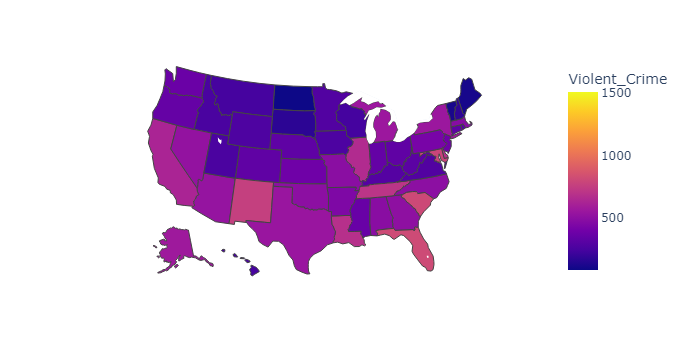

In [10]:
px.choropleth(
    crime, 
    locations = "Code",
    locationmode = 'USA-states',
    scope = 'usa',
    color = 'Violent_Crime', 
    hover_name = 'State', 
    hover_data = ['Violent_Crime', 'Murder_Rate']
)

| **Map Type**               | **Key Parameters**                                      | **Scope/Mode**              |
|----------------------------|--------------------------------------------------------|-----------------------------|
| **State-Level US Map**      | `locations='Code'`, `locationmode='USA-states'`         | `scope='usa'`               |
| **County-Level US Map**     | `locations='FIPS'`, `locationmode='USA-counties'`       | `scope='usa'`               |
| **World Map**               | `locations='iso_alpha'`, `projection='natural earth'`   | Global                      |
| **Scatter Map**             | `lat='Latitude'`, `lon='Longitude'`                    | Global or Regional          |
| **Region Maps**             | `scope='europe'`, `locations='iso_alpha'`              | Europe, Africa, Asia, etc.  |
| **Bubble Map**              | `size='Value'`, `lat`, `lon`                           | Global or Regional          |
| **Heatmap on Map**          | `z='Value'`, `lat`, `lon`                              | Mapbox                      |

#### Geoda

GeoDa, short for Geographic Data Analysis, is a powerful open-source software tool designed for exploratory spatial data analysis (ESDA). In this lecture, we will use the geospatial data from

https://www.naturalearthdata.com/downloads/

https://geodacenter.github.io/data-and-lab/

In [14]:
import geopandas 
import geodatasets

chicago = geopandas.read_file(geodatasets.get_path('geoda.chicago_commpop'))
chicago.head()

community  NID  POP2010  POP2000  POPCH   POPPERCH  popplus  popneg  \
0          DOUGLAS   35    18238    26470  -8232 -31.099358        0       1   
1          OAKLAND   36     5918     6110   -192  -3.142390        0       1   
2      FULLER PARK   37     2876     3420   -544 -15.906433        0       1   
3  GRAND BOULEVARD   38    21929    28006  -6077 -21.698922        0       1   
4          KENWOOD   39    17841    18363   -522  -2.842673        0       1   

                                            geometry  
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...  
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...  
2  MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...  
3  MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...  
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...

In [16]:
groceries = geopandas.read_file(geodatasets.get_path('geoda.groceries'))
groceries.head()

OBJECTID     Ycoord     Xcoord Status  \
0        16  41.973266 -87.657073   OPEN   
1        18  41.696367 -87.681315   OPEN   
2        22  41.868634 -87.638638   OPEN   
3        23  41.877590 -87.654953   OPEN   
4        27  41.737696 -87.625795   OPEN   

                                        Address               Chain Category  \
0          1051 W ARGYLE ST, CHICAGO, IL. 60640      VIET HOA PLAZA     None   
1  10800 S WESTERN AVE, CHICAGO, IL. 60643-3226   COUNTY FAIR FOODS     None   
2      1101 S CANAL ST, CHICAGO, IL. 60607-4932  WHOLE FOODS MARKET     None   
3  1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905        TARGET/SUPER      new   
4        112 W 87TH ST, CHICAGO, IL. 60620-1318         FOOD 4 LESS     None   

                               geometry  
0  MULTIPOINT (1168268.672 1933554.350)  
1  MULTIPOINT (1162302.618 1832900.224)  
2  MULTIPOINT (1173317.042 1895425.426)  
3  MULTIPOINT (1168996.475 1898801.406)  
4  MULTIPOINT (1176991.989 1847262.423)

#### Create the geospatial data from columns

In [17]:
from shapely.geometry import Point

groceries1 = groceries.copy()
groceries1['geometry'] = [Point(xy) for xy in zip(groceries1['Xcoord'],
                                                 groceries1['Ycoord'])]

In [18]:
groceries1.head()

OBJECTID     Ycoord     Xcoord Status  \
0        16  41.973266 -87.657073   OPEN   
1        18  41.696367 -87.681315   OPEN   
2        22  41.868634 -87.638638   OPEN   
3        23  41.877590 -87.654953   OPEN   
4        27  41.737696 -87.625795   OPEN   

                                        Address               Chain Category  \
0          1051 W ARGYLE ST, CHICAGO, IL. 60640      VIET HOA PLAZA     None   
1  10800 S WESTERN AVE, CHICAGO, IL. 60643-3226   COUNTY FAIR FOODS     None   
2      1101 S CANAL ST, CHICAGO, IL. 60607-4932  WHOLE FOODS MARKET     None   
3  1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905        TARGET/SUPER      new   
4        112 W 87TH ST, CHICAGO, IL. 60620-1318         FOOD 4 LESS     None   

                 geometry  
0  POINT (-87.657 41.973)  
1  POINT (-87.681 41.696)  
2  POINT (-87.639 41.869)  
3  POINT (-87.655 41.878)  
4  POINT (-87.626 41.738)

#### Merge the geospatial data with attributes

In [19]:
import pandas as pd

crime.head()

State  Violent_Crime  Murder_Rate  Poverty  High_School  College  \
0     Alabama            486          7.4     14.7         77.5     20.4   
1      Alaska            567          4.3      8.4         90.4     28.1   
2     Arizona            532          7.0     13.5         85.1     24.6   
3    Arkansas            445          6.3     15.8         81.7     18.4   
4  California            622          6.1     14.0         81.2     27.5   

   Single_Parent  Unemployed  Metropolitan Code  
0           26.0         4.6          70.2   AL  
1           23.2         6.6          41.6   AK  
2           23.5         3.9          87.9   AZ  
3           24.7         4.4          49.0   AR  
4           21.8         4.9          96.7   CA

In [20]:
state = geopandas.read_file("ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")
state.head()

featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1       Montana   
2  http://en.wikipedia.org/wiki/North_Dakota     US        1  North Dakota   
3        http://en.wikipedia.org/wiki/Hawaii     US        8        Hawaii   
4         http://en.wikipedia.org/wiki/Idaho     US        1         Idaho   

    name_alt  ... FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT FCLASS_NL FCLASS_SE  \
0   MN|Minn.  ...      None      None      None      None      None      None   
1   MT|Mont.  ...      None      None      None      None      None      None   
2    ND|N.D.  ...      None      None      None      None      None      None   
3  HI|Hawaii  ...      None      None      None      None      None      None   
4   ID|Idaho  ...      None      None      None      None      None      None   

  FCLASS_BD FCLASS_UA FCLASS_TLC  \
0      None      None       None   
1      None      None       None   
2      None      None       None   
3      None      None       None   
4      None      None       None   

                                            geometry  
0  POLYGON ((-89.95766 47.28691, -90.13175 47.292...  
1  POLYGON ((-116.04823 49.00037, -113.05950 49.0...  
2  POLYGON ((-97.22894 49.00089, -97.21414 48.902...  
3  MULTIPOLYGON (((-155.93665 19.05939, -155.9080...  
4  POLYGON ((-116.04823 49.00037, -115.96780 47.9...  

[5 rows x 122 columns]

In [21]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

C:\Users\yangx\AppData\Local\Temp\ipykernel_92496\850357869.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [22]:
import pandas as pd

full = pd.merge(crime, state, left_on = 'State', right_on = 'name', how = 'outer')
full.head()

State  Violent_Crime  Murder_Rate  Poverty  High_School  College  \
0     Alabama            486          7.4     14.7         77.5     20.4   
1      Alaska            567          4.3      8.4         90.4     28.1   
2     Arizona            532          7.0     13.5         85.1     24.6   
3    Arkansas            445          6.3     15.8         81.7     18.4   
4  California            622          6.1     14.0         81.2     27.5   

   Single_Parent  Unemployed  Metropolitan Code  ... FCLASS_ID  FCLASS_PL  \
0           26.0         4.6          70.2   AL  ...      None       None   
1           23.2         6.6          41.6   AK  ...      None       None   
2           23.5         3.9          87.9   AZ  ...      None       None   
3           24.7         4.4          49.0   AR  ...      None       None   
4           21.8         4.9          96.7   CA  ...      None       None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE FCLASS_BD  FCLASS_UA FCLASS_TLC  \
0      None       None      None      None      None       None       None   
1      None       None      None      None      None       None       None   
2      None       None      None      None      None       None       None   
3      None       None      None      None      None       None       None   
4      None       None      None      None      None       None       None   

                                            geometry  
0  POLYGON ((-88.16696 34.99967, -86.90968 34.999...  
1  MULTIPOLYGON (((-153.22873 57.96897, -152.5647...  
2  POLYGON ((-109.04522 36.99991, -109.04367 31.3...  
3  POLYGON ((-89.66292 36.02307, -89.67351 35.940...  
4  POLYGON ((-114.64222 35.05311, -114.62212 34.9...  

[5 rows x 132 columns]

In [19]:
# FIPS: Federal Information Processing System
# https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm


### processing geospatial data and making a map

<Axes: >

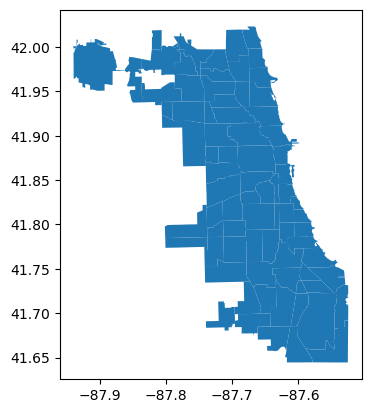

In [23]:
chicago.plot()

<Axes: >

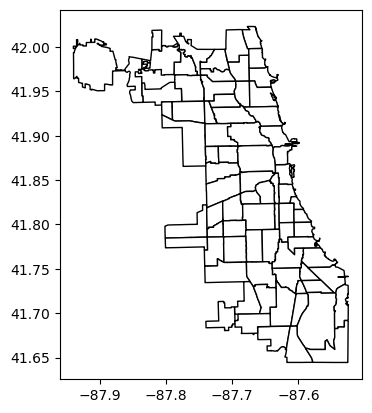

In [24]:
chicago.plot(color = 'white', edgecolor = 'black')

In [25]:
chicago['centroid'] = chicago.centroid
chicago.head()

C:\Users\yangx\AppData\Local\Temp\ipykernel_92496\3223654428.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




community  NID  POP2010  POP2000  POPCH   POPPERCH  popplus  popneg  \
0          DOUGLAS   35    18238    26470  -8232 -31.099358        0       1   
1          OAKLAND   36     5918     6110   -192  -3.142390        0       1   
2      FULLER PARK   37     2876     3420   -544 -15.906433        0       1   
3  GRAND BOULEVARD   38    21929    28006  -6077 -21.698922        0       1   
4          KENWOOD   39    17841    18363   -522  -2.842673        0       1   

                                            geometry  \
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...   
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...   
2  MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ...   
3  MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ...   
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...   

                     centroid  
0  POINT (-87.61868 41.83512)  
1  POINT (-87.60322 41.82375)  
2  POINT (-87.63242 41.80909)  
3  POINT (-87.61786 41.81295)  
4  POINT (-87.59618 41.80892)

<Axes: >

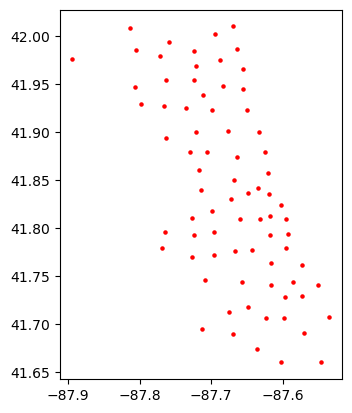

In [27]:
chicago = chicago.set_geometry('centroid')
chicago.plot(color = 'red', markersize = 5)

#### In-class activities 1

- Plot the map for lower 48 US states (excluding Alaska and Hawaii). Only plot the boundary. 
- Extract the MA county information from the county data and only plot for the MA county. 

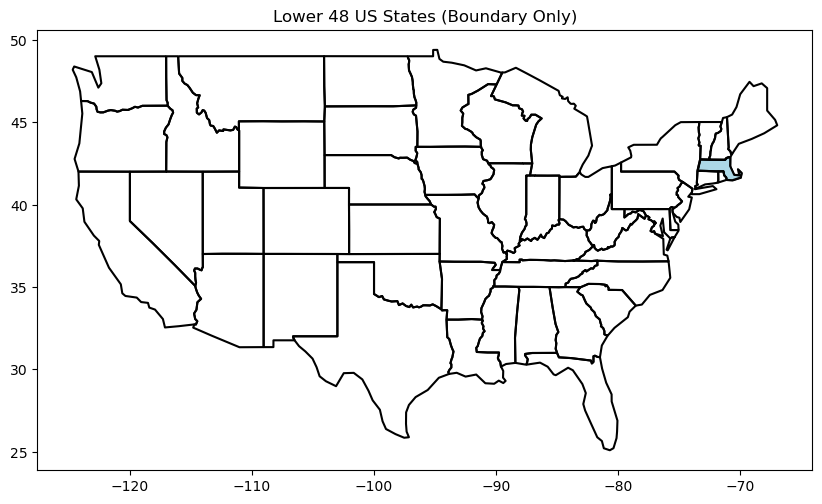

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

us_states = gpd.read_file("/Users/sonalgupta/Downloads/DS7/ne_110m_admin_1_states_provinces")

lower_48 = us_states[(us_states['admin'] == 'United States of America') & 
                     (~us_states['name'].isin(['Alaska', 'Hawaii']))]

fig, ax = plt.subplots(figsize=(10, 6))
lower_48.boundary.plot(ax=ax, color='black')
ax.set_title("Lower 48 US States (Boundary Only)")

ma_state = us_states[(us_states['admin'] == 'United States of America') & 
                     (us_states['name'] == 'Massachusetts')]

ma_state.plot(ax=ax, color='lightblue', edgecolor='black')
plt.show()

In [20]:
# The FIPS for MA is 25


### creating choropleth maps and customization

Choropleth maps are a type of thematic map that represent spatial data through color gradients or shading. They use color-coded areas, such as countries, states, or administrative regions, to visualize quantitative data, with darker or lighter shades indicating higher or lower values respectively. 

<Axes: >

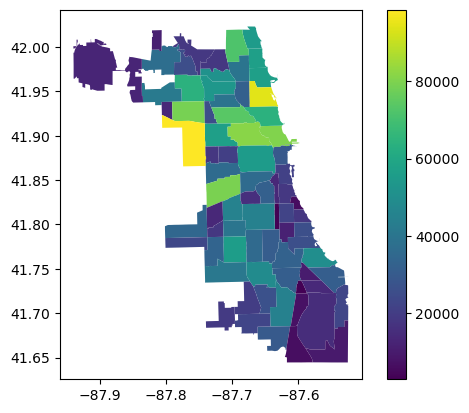

In [30]:
chicago = chicago.set_geometry('geometry')
chicago.plot(column = "POP2010", legend = True)

<Axes: >

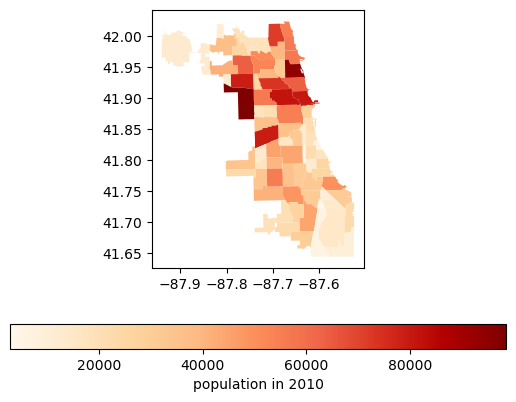

In [33]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html
chicago.plot(column = "POP2010", legend = True,
            cmap = 'OrRd', 
            legend_kwds = {'label': 'population in 2010', 'orientation': 'horizontal'})

<Axes: >

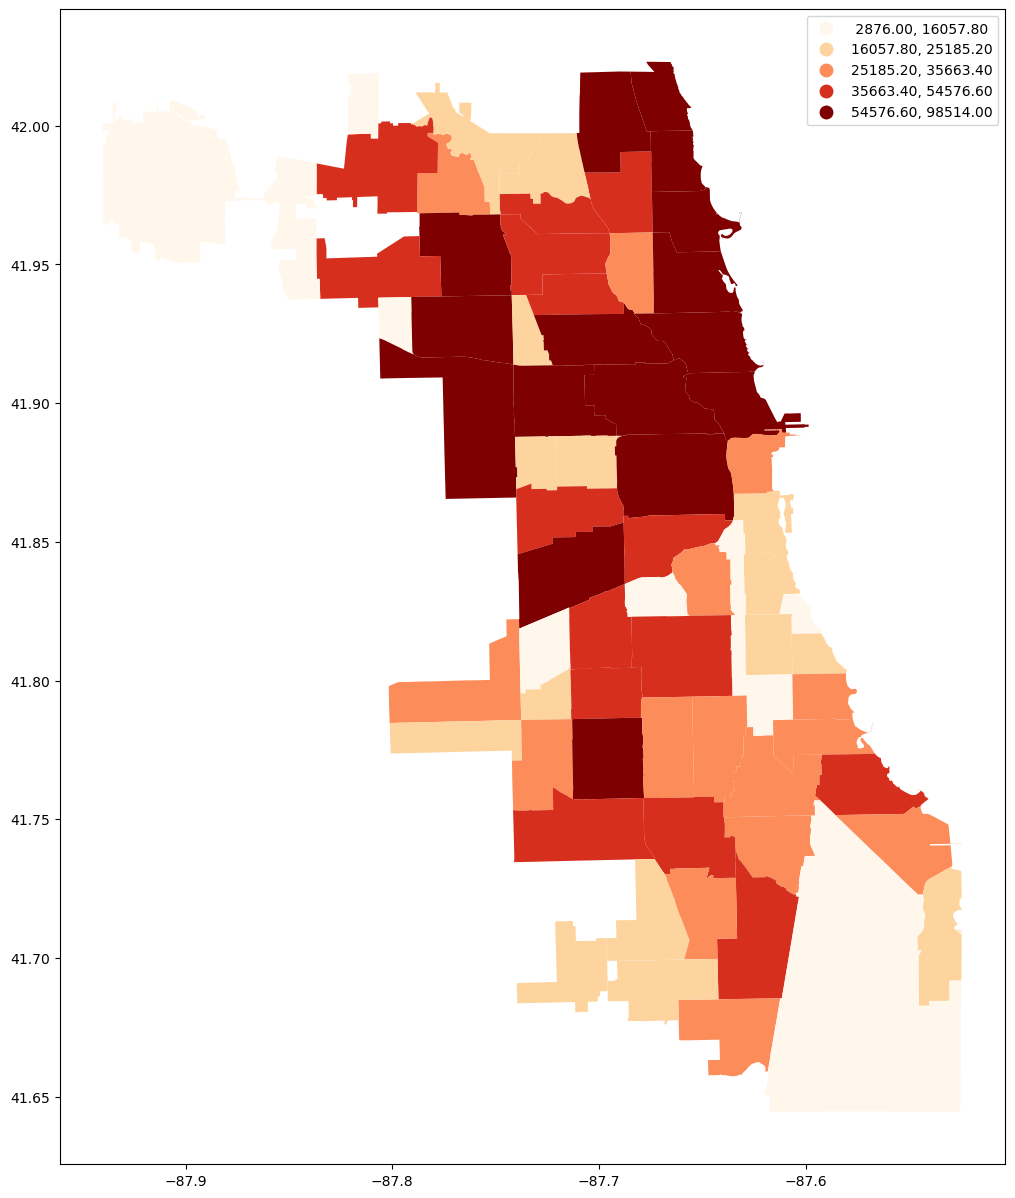

In [35]:
chicago.plot(column = "POP2010", legend = True,
            cmap = 'OrRd', 
            scheme = 'quantiles', 
            figsize = (20,15))

C:\Users\yangx\AppData\Local\Temp\ipykernel_92496\2211375300.py:3: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




State  Violent_Crime  Murder_Rate  Poverty  High_School  College  \
0     Alabama            486          7.4     14.7         77.5     20.4   
1      Alaska            567          4.3      8.4         90.4     28.1   
2     Arizona            532          7.0     13.5         85.1     24.6   
3    Arkansas            445          6.3     15.8         81.7     18.4   
4  California            622          6.1     14.0         81.2     27.5   

   Single_Parent  Unemployed  Metropolitan Code  ... FCLASS_PL  FCLASS_GR  \
0           26.0         4.6          70.2   AL  ...      None       None   
1           23.2         6.6          41.6   AK  ...      None       None   
2           23.5         3.9          87.9   AZ  ...      None       None   
3           24.7         4.4          49.0   AR  ...      None       None   
4           21.8         4.9          96.7   CA  ...      None       None   

  FCLASS_IT  FCLASS_NL FCLASS_SE FCLASS_BD FCLASS_UA  FCLASS_TLC  \
0      None       None      None      None      None        None   
1      None       None      None      None      None        None   
2      None       None      None      None      None        None   
3      None       None      None      None      None        None   
4      None       None      None      None      None        None   

                                            geometry  \
0  POLYGON ((-88.16696 34.99967, -86.90968 34.999...   
1  MULTIPOLYGON (((-153.22873 57.96897, -152.5647...   
2  POLYGON ((-109.04522 36.99991, -109.04367 31.3...   
3  POLYGON ((-89.66292 36.02307, -89.67351 35.940...   
4  POLYGON ((-114.64222 35.05311, -114.62212 34.9...   

                      centroid  
0   POINT (-86.82818 32.77371)  
1  POINT (-152.82596 64.37553)  
2  POINT (-111.65946 34.29560)  
3   POINT (-92.44486 34.92181)  
4  POINT (-119.64054 37.25514)  

[5 rows x 133 columns]

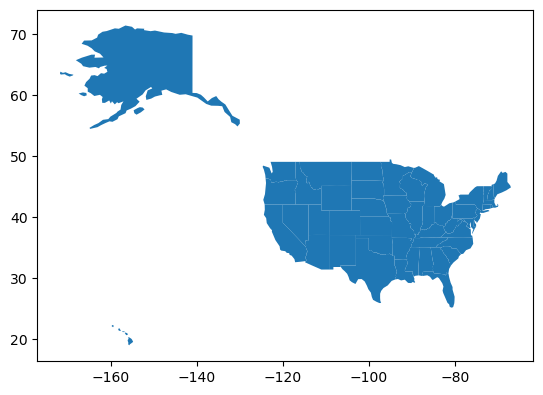

In [40]:
full = full.set_geometry('geometry')
full.plot()
full['centroid'] = full.centroid
full.head()

In [41]:
full[['lon', 'lat']] = full['centroid'].astype('str').str.extract('\(([^ ]+) ([^ ]+)\)').astype(float)

In [42]:
full.head()

State  Violent_Crime  Murder_Rate  Poverty  High_School  College  \
0     Alabama            486          7.4     14.7         77.5     20.4   
1      Alaska            567          4.3      8.4         90.4     28.1   
2     Arizona            532          7.0     13.5         85.1     24.6   
3    Arkansas            445          6.3     15.8         81.7     18.4   
4  California            622          6.1     14.0         81.2     27.5   

   Single_Parent  Unemployed  Metropolitan Code  ... FCLASS_IT  FCLASS_NL  \
0           26.0         4.6          70.2   AL  ...      None       None   
1           23.2         6.6          41.6   AK  ...      None       None   
2           23.5         3.9          87.9   AZ  ...      None       None   
3           24.7         4.4          49.0   AR  ...      None       None   
4           21.8         4.9          96.7   CA  ...      None       None   

  FCLASS_SE  FCLASS_BD FCLASS_UA FCLASS_TLC  \
0      None       None      None       None   
1      None       None      None       None   
2      None       None      None       None   
3      None       None      None       None   
4      None       None      None       None   

                                            geometry  \
0  POLYGON ((-88.16696 34.99967, -86.90968 34.999...   
1  MULTIPOLYGON (((-153.22873 57.96897, -152.5647...   
2  POLYGON ((-109.04522 36.99991, -109.04367 31.3...   
3  POLYGON ((-89.66292 36.02307, -89.67351 35.940...   
4  POLYGON ((-114.64222 35.05311, -114.62212 34.9...   

                      centroid         lon        lat  
0   POINT (-86.82818 32.77371)  -86.828178  32.773709  
1  POINT (-152.82596 64.37553) -152.825957  64.375529  
2  POINT (-111.65946 34.29560) -111.659463  34.295595  
3   POINT (-92.44486 34.92181)  -92.444864  34.921808  
4  POINT (-119.64054 37.25514) -119.640544  37.255145  

[5 rows x 135 columns]

In [5]:
px.scatter_geo(
    full,
    lat = 'lat',
    lon = 'lon',
    size = 'Violent_Crime',
    color = 'Violent_Crime',
    scope = 'usa'
)

NameError: name 'px' is not defined

### Missing values

In [46]:
import numpy as np

chicago.loc[np.random.choice(chicago.index, 15), 'POP2010'] = np.nan

<Axes: >

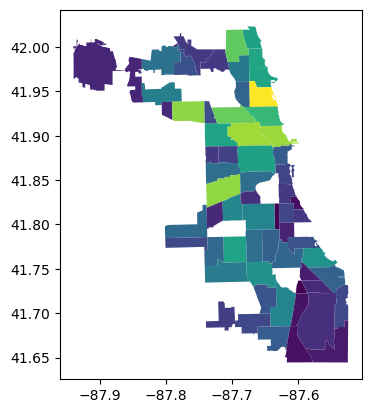

In [48]:
chicago.plot(column = "POP2010")

<Axes: >

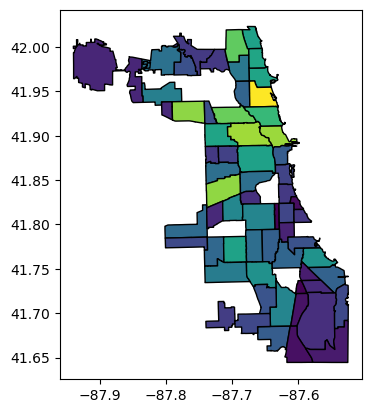

In [49]:
chicago.plot(column = "POP2010", edgecolor = 'black')

<Axes: >

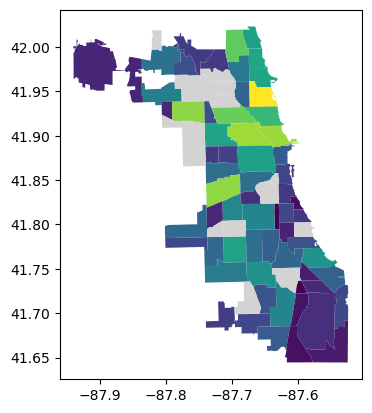

In [50]:
chicago.plot(column = "POP2010", missing_kwds = {'color':'lightgrey'})

<Axes: >

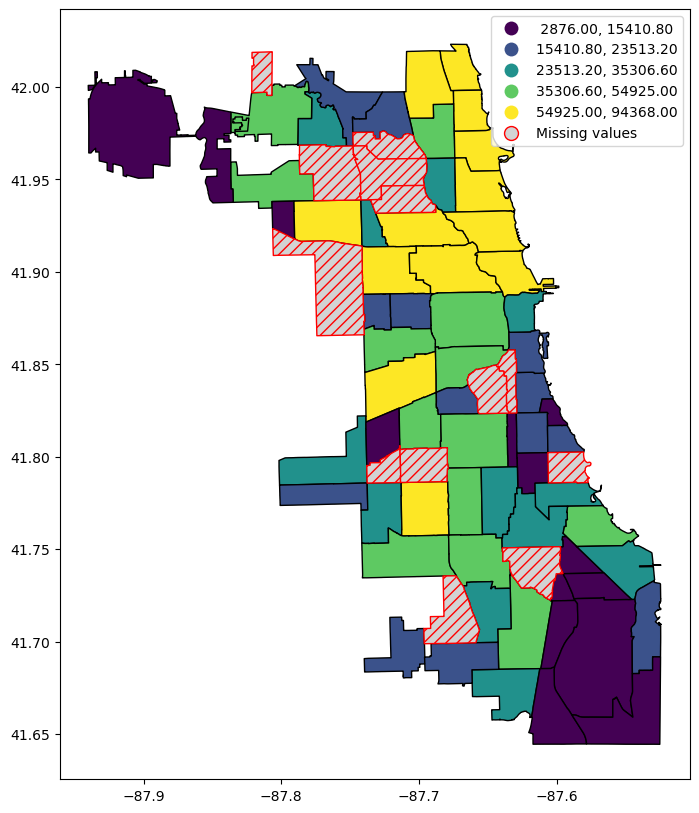

In [56]:
chicago.plot(column = "POP2010", edgecolor = 'black',
             legend = True,
             scheme = 'quantiles', 
             figsize = (15, 10),
             missing_kwds = {'color':'lightgrey',
                            'edgecolor': 'red', 
                            'hatch': '///', 
                            'label': 'Missing values'})

### Adding multiple layers

In order to add multiple layers to the map, we need to make the sure the map has the same coordination system. 

<Axes: >

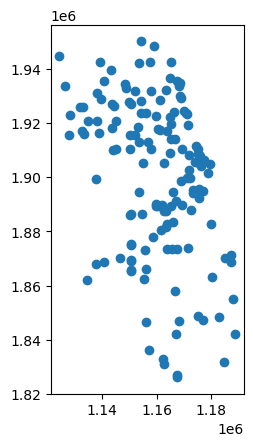

In [57]:
groceries.plot()

<Axes: >

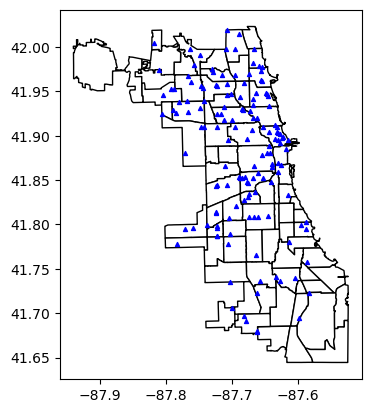

In [60]:
#Marker choices: https://matplotlib.org/stable/api/markers_api.html

groceries = groceries.to_crs(chicago.crs)
base = chicago.plot(color = 'white', edgecolor = 'black')
groceries.plot(ax = base, marker = '^', color = 'blue', markersize = 8)

### Creating interactive maps

Folium is a Python library that allows for the creation of interactive maps directly within the Jupyter Notebook environment. Leveraging the power of Leaflet.js, Folium enables users to visualize geospatial data and overlay various map elements such as markers, polygons, and heatmaps.

In [61]:
import folium

chicago.explore(
    column = 'POP2000'
)

#### In-class activities 2

Create an interactive map with the lower 48 states. The color is decided by the Poverty. Also when we move the mouse on one state, the state name shows, and when we click one state, the violent crime number and murder rate show. 

In [14]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip, GeoJsonPopup

crime_data = pd.read_csv("/Users/sonalgupta/Downloads/DS7/us_statewide_crime.csv")

us_states = gpd.read_file("/Users/sonalgupta/Downloads/DS7/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp")

us_states = us_states[(us_states['admin'] == 'United States of America') & 
                      (~us_states['name'].isin(['Alaska', 'Hawaii']))]


us_states = us_states.merge(crime_data, left_on='name', right_on='State')

#check
print(us_states[['name', 'Violent_Crime', 'Murder_Rate']].head(10))


m = folium.Map(location=[37.8, -96], zoom_start=4)

def style_function(feature):
    poverty = feature['properties']['Poverty']
    return {
        'fillColor': '#FFEDA0' if poverty < 10 else '#FED976' if poverty < 15 else '#FEB24C' if poverty < 20 else '#E31A1C',
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    }

tooltip = GeoJsonTooltip(
    fields=['name'], 
    aliases=['State: '],
    localize=True
)

popup = GeoJsonPopup(
    fields=['name', 'Violent_Crime', 'Murder_Rate'],
    aliases=['State:', 'Violent Crime:', 'Murder Rate:'],
    localize=True,
    sticky=True  
)

folium.GeoJson(
    us_states,
    name="Lower 48 States",
    style_function=style_function,
    tooltip=tooltip,
    popup=popup
).add_to(m)

m


           name  Violent_Crime  Murder_Rate
0     Minnesota            281          3.1
1       Montana            241          1.8
2  North Dakota             81          0.6
3         Idaho            253          1.2
4    Washington            370          3.3
5       Arizona            532          7.0
6    California            622          6.1
7      Colorado            334          3.1
8        Nevada            524          6.5
9    New Mexico            758          7.4


#### In-class activity 3 (homework)

Explore the information on 
https://www.naturalearthdata.com/downloads/ and download two datasets. For example, a world map as well as world airport locations. Try to plot the two datasets on the same map. Create one static map and customized the colors or marks. Create another interactive map with tooltip and popout functions. 

/var/folders/z_/38c5mnf16clfdzd6yhwyxg380000gn/T/ipykernel_74942/1873469318.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/z_/38c5mnf16clfdzd6yhwyxg380000gn/T/ipykernel_74942/1873469318.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


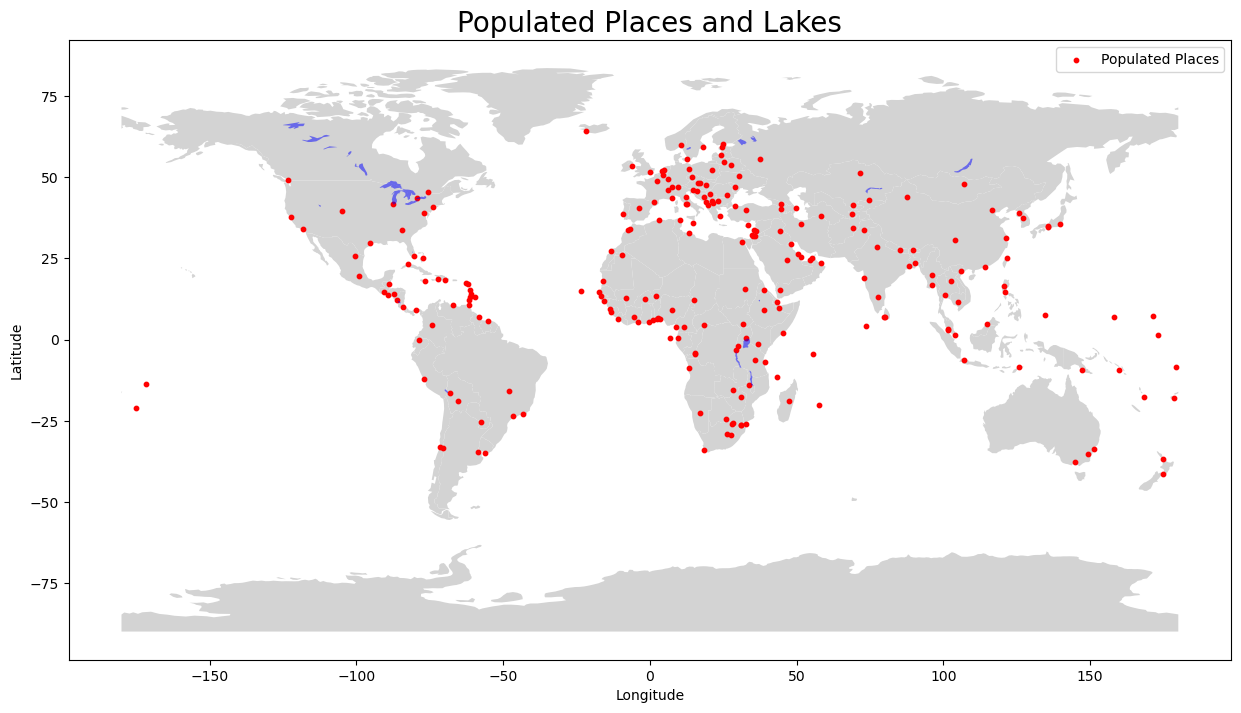

In [15]:
import geopandas as gpd
import pandas as pd

populated_places = gpd.read_file("/Users/sonalgupta/Downloads/DS7/ne_110m_populated_places/ne_110m_populated_places.shp") 
lakes = gpd.read_file("/Users/sonalgupta/Downloads/DS7/ne_110m_lakes/ne_110m_lakes.shp")  # or .shp

#static
import matplotlib.pyplot as plt

# Create a base map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color='lightgrey')

# Plot the populated places
populated_places.plot(ax=ax, color='red', markersize=10, label='Populated Places')

# Plot the lakes
lakes.plot(ax=ax, color='blue', alpha=0.5, label='Lakes')

# Customizing the plot
plt.title('Populated Places and Lakes', fontsize=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


In [21]:
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

populated_places = gpd.read_file('/Users/sonalgupta/Downloads/DS7/ne_110m_populated_places/ne_110m_populated_places.shp')
lakes = gpd.read_file('/Users/sonalgupta/Downloads/DS7/ne_110m_lakes/ne_110m_lakes.shp')

populated_places.columns = [col.lower() for col in populated_places.columns]
lakes.columns = [col.lower() for col in lakes.columns]

m = folium.Map(location=[20, 0], zoom_start=2)

tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['City: ']
)

folium.GeoJson(
    populated_places,
    name='Populated Places',
    tooltip=tooltip,
    marker=folium.CircleMarker(radius=5, color='red', fill=True, fill_opacity=0.6)
).add_to(m)

lake_tooltip = GeoJsonTooltip(
    fields=['name'],  
    aliases=['Lake: ']
)

folium.GeoJson(
    lakes,
    name='Lakes',
    tooltip=lake_tooltip,
    style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.5}
).add_to(m)

folium.LayerControl().add_to(m)

m
